In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [127]:
df_2007 = pd.read_csv("mls-salaries-2007.csv")
df_2008 = pd.read_csv("mls-salaries-2008.csv")
df_2009 = pd.read_csv("mls-salaries-2009.csv")
df_2010 = pd.read_csv("mls-salaries-2010.csv")
df_2011 = pd.read_csv("mls-salaries-2011.csv")
df_2012 = pd.read_csv("mls-salaries-2012.csv")
df_2013 = pd.read_csv("mls-salaries-2013.csv")
df_2014 = pd.read_csv("mls-salaries-2014.csv")
df_2015 = pd.read_csv("mls-salaries-2015.csv")
df_2016 = pd.read_csv("mls-salaries-2016.csv")
df_2017 = pd.read_csv("mls-salaries-2017.csv")
df_2007['Ano'] = 2007
df_2008['Ano'] = 2008
df_2009['Ano'] = 2009
df_2010['Ano'] = 2010
df_2011['Ano'] = 2011
df_2012['Ano'] = 2012
df_2013['Ano'] = 2013
df_2014['Ano'] = 2014
df_2015['Ano'] = 2015
df_2016['Ano'] = 2016
df_2017['Ano'] = 2017
df_total = pd.concat([df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017])
df_inflacao = pd.read_excel("inflação.xlsx")

In [128]:
df_campeoes = pd.read_excel("campeoes mls.xlsx")
df_campeoes.replace(["Los Angeles Galaxy",'DC United','Real Salt Lake',
                     'New England Revolution','Seattle Sounders FC','Houston Dynamo',
                    'San Jose Earthquakes','Sporting Kansas City','Columbus Crew','Seattle Sounders',
                     'New York Red Bulls','D.C. United','Colorado Rapids','FC Dallas','Portland Timbers','Toronto FC'],
                 ['LA','DC','RSL','NE','SEA','HOU','SJ','KC','CLB','SEA','NYRB','DC','COL','DAL','POR','TOR'],inplace=True)
#Alguns ajustes para colocar os times nas siglas do DF do Kaggle

## 1 - Fazer um gráfico com a variação anual do salário dos jogadores

In [129]:
df_acumulado = df_total.groupby("Ano").sum()['base_salary'].reset_index() #Somando o salário das equipes por ano
df_acumulado['Diferença'] = df_acumulado.pct_change()['base_salary'] #Calculando o quanto variou o salário dos jogadores

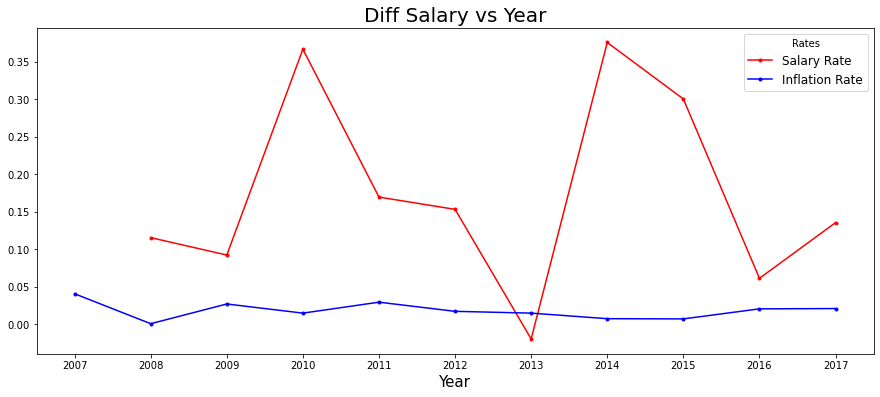

In [130]:
figura,ax = plt.subplots(figsize=(15,6))
plt.style.use('tableau-colorblind10')
x = df_acumulado['Ano']
y = df_acumulado['Diferença']
y_1 = df_inflacao['Inflação']
grafico_linha = ax.plot(x,y,'r.-',label='Salary Rate') 
grafico_linha = ax.plot(x,y_1,'b.-',label='Inflation Rate')
ax.set_title("Diff Salary vs Year",{"fontsize":20})
ax.set_xlabel("Year",{"fontsize":15})
ax.set_xticks(range(2007,2018)) #Colocando o tamanho do x tick
ax.set_xticklabels(df_acumulado['Ano'].to_list()) #Colocando quem são os x tick
plt.legend(title='Rates',fontsize=12)
pd.set_option("display.precision",2)

##  2- Fazer um gráfico com o salário por time em 2016

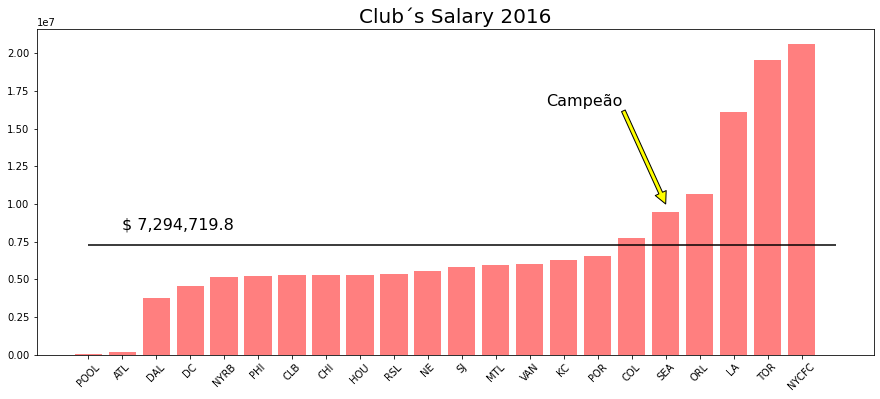

In [131]:
df_club_2016 = df_2016.groupby('club').sum()['base_salary'].reset_index().sort_values(by='base_salary')
plt.style.use('tableau-colorblind10')
fig,ax=plt.subplots(figsize=(15,6))
ax.set_title("Club´s Salary 2016",{'fontsize':20})
plt.xticks(rotation=45) #Rotacionando as etiquetas do x em 45°
ax.bar(df_club_2016['club'],df_club_2016['base_salary'],alpha=0.5,color='r')
#Color a média como uma reta
plt.hlines(df_club_2016['base_salary'].mean(),color='#000000',xmin='POOL',xmax = len(df_club_2016['club'].to_list())) #Colocando a linha horizontal
numero_com_milhar = round(df_club_2016['base_salary'].mean(),2)
numero_com_milhar = '{0:,}'.format(numero_com_milhar)

ax.annotate("$ " + str(numero_com_milhar),(1,df_club_2016['base_salary'].mean()+10**6),fontsize=16)
#Colocar um texto para saber o campeão
ax.annotate('Campeão', (17, 10**7),
            xytext=(0.7, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='yellow', shrink=50),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')
plt.show()

## 3 - Buscar o campeão de cada ano e tentar fazer um paralelo com o salário


In [132]:
df_campeoes = df_campeoes.rename(columns={"MLS Cup":"club"}) #Alterando o compeão pelo nome do clube apenas para fazer o join
df_campeoes = df_campeoes[['Ano','club']] #Selecionando o campeão e o ano
df_campeoes_salary = pd.merge(df_campeoes,df_total,on=['Ano','club'],how='left') #Fazendo o merge com duas chaves Ano e Clube

df_campeoes_salary = df_campeoes_salary.groupby(["club",'Ano']).sum()['base_salary'].reset_index().sort_values(by='Ano')
df_campeoes_salary.set_index("Ano",inplace=True) #Ajustando p/ que some o salário de todos os jogadores

df_media = df_total.groupby(["Ano",'club']).sum().reset_index() #Devemos somar o salário de todos os jogadores de todas as equipes
df_media = df_media.groupby("Ano").median()['base_salary'] #Fazer a média do salário de todas as equipes

df_max = df_total.groupby(["Ano",'club']).sum().reset_index() #Devemos somar o salário de todos os jogadores de todas as equipes
df_max = df_max.groupby("Ano").max()['base_salary'] #Obter o time com o maior salário

df_min = df_total.groupby(["Ano",'club']).sum().reset_index() #Devemos somar o salário de todos os jogadores de todas as equipes
df_min = df_min.groupby("Ano").min()['base_salary'] #Obter o time com o maior salário
df_campeoes_salary_comparison = pd.concat([df_campeoes_salary,df_media,df_max,df_min],axis=1)
df_campeoes_salary_comparison.columns=['Club','Champion Salary','Median Salary','Max Salary','Min Salary']


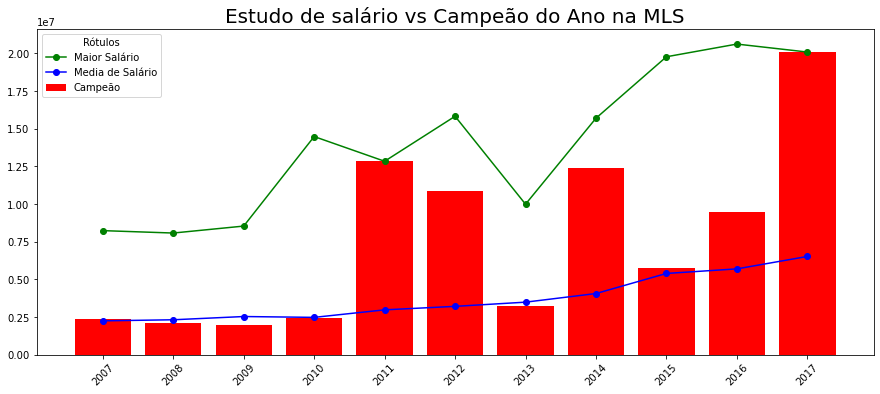

In [133]:
#Fazendo o gráfico

plt.style.use('tableau-colorblind10')
x= df_campeoes_salary_comparison.index
fig,ax=plt.subplots(figsize=(15,6))
ax.bar(x=df_campeoes_salary_comparison.index,height=df_campeoes_salary_comparison['Champion Salary'],color='r',label ='Campeão')
ax.plot(df_campeoes_salary_comparison.index,df_campeoes_salary_comparison['Max Salary'],color='g',label="Maior Salário",marker='o')
ax.plot(df_campeoes_salary_comparison.index,df_campeoes_salary_comparison['Median Salary'],color='b',label='Media de Salário',marker='o')
ax.set_xticks(range(2007,2018))
ax.set_xticklabels(df_campeoes_salary_comparison.index)
ax.legend(loc='upper left',title='Rótulos') 
ax.set_title("Estudo de salário vs Campeão do Ano na MLS",{"fontsize":20})
plt.xticks(rotation = 45)
plt.show()